# Making big cats using heralding: a MrMustard tutorial
## Nicolás Quesada [(@polyquantique)](https://twitter.com/polyquantique)
###  🟦 🟩 🟧 🟥 Polytechnique Montréal

In [1]:
# We do the usual imports
from mrmustard.lab import *
from mrmustard.math import Math
import numpy as np
math = Math()

2021-12-16 09:48:54.922705: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-16 09:48:54.922721: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2021-12-16 09:48:56.443995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-16 09:48:56.444021: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-16 09:48:56.444043: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2021-12-16 09:48:56.444595: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### State

| Purity | Num modes | Bosonic size | Gaussian | Fock |
| :----: | :----: | :----: | :----: | :----: |
| 1.000 | 1 | N/A | ❌ | ✅ |

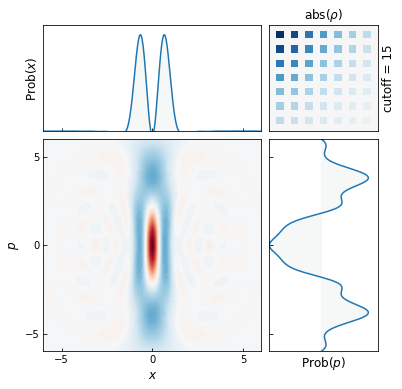

In [2]:
# For our preparation we will use a circuit with two squeezers, a beamsplitter and will herald on 3 photons in the first mode

# Two parallel squeezers
S = Sgate(r=[1.0,1.0],phi=[0.0, 0.0],r_trainable=True, phi_trainable=True)

# A beamsplitter
B = BSgate(theta=0.1, phi=np.pi/2+0.2, theta_trainable=True, phi_trainable=True)

# Define the circuit including the measurement
def output():
    return Vacuum(2) >> S >> B << Fock(3, modes =[0], normalize=True)

# Let's have a look at what we get with the arbitrary squeezing and beamsplitters parameters defined above
output()

#### State

| Purity | Num modes | Bosonic size | Gaussian | Fock |
| :----: | :----: | :----: | :----: | :----: |
| 1.000 | 1 | N/A | ❌ | ✅ |

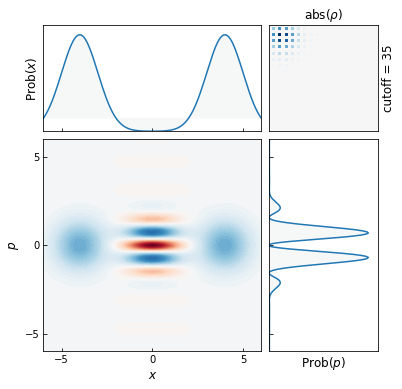

In [3]:
# We would like to prepare a cat state with amplitude equal to 2.0
# Here is what it looks like
alpha = 2.0
cutoff = 35
cat_amps = Coherent(alpha).ket([cutoff]) - Coherent(-alpha).ket([cutoff])
cat_amps = cat_amps / np.linalg.norm(cat_amps)
cat = State(ket=cat_amps)
cat_ket = cat.ket(cutoffs = [cutoff]).numpy() 
cat_ket /= np.linalg.norm(cat_ket)
# We can easily visualize the Wigner function of our feline:
cat

Output()

Loss looks stable, stopping here.


Step 1009/1100 | 25.8 it/s ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━  92% Cost = -0.07625 | ⏳  0:00:04

#### State

| Purity | Num modes | Bosonic size | Gaussian | Fock |
| :----: | :----: | :----: | :----: | :----: |
| 1.000 | 1 | N/A | ❌ | ✅ |

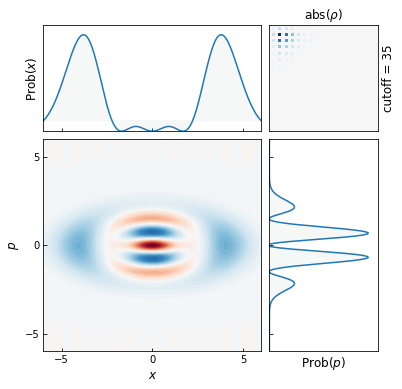

In [4]:
# We know setup our cost function so as to maximize the overlap between the output of our heralding circuit and the cat we want
def cost_fn():
    ket = output().ket(cutoffs=[cutoff])
    return -math.abs(math.sum(math.conj(cat_ket) * ket))**2 #+ 0*math.abs(math.abs(ket[0])- math.abs(ket[1]))**2 + 10*math.abs(math.norm(ket[2:]))**2

from mrmustard.utils.training import Optimizer
opt = Optimizer(euclidean_lr = 0.001) #symplectic_lr = 0.001
opt.minimize(cost_fn, by_optimizing=[B,S], max_steps=1100)
output()

In [5]:
# We can investigate what the fidelity is
ket = output()
ket_norm = ket.fock / math.norm(ket.fock)
np.abs(np.dot(cat_ket, ket_norm))**2

0.9410238238762689

In [6]:
# And the probability of success
np.linalg.norm(ket.fock)**2

0.08103397861779787

In [9]:
# Finally we can find what are the optimal parameters MrMustard found:
print(S)

                                       Sgate                                       
┏━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┓
┃ Parameters ┃ dtype   ┃ Value                 ┃ Bounds       ┃ Shape ┃ Trainable ┃
┡━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━┩
│ r          │ float64 │ [1.686538 0.528073]   │ (0.0, None)  │ (2,)  │ True      │
│ phi        │ float64 │ [-0.131361  0.015425] │ (None, None) │ (2,)  │ True      │
└────────────┴─────────┴───────────────────────┴──────────────┴───────┴───────────┘

In [8]:
B

                                     BSgate                                     
┏━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┓
┃ Parameters ┃ dtype   ┃ Value              ┃ Bounds       ┃ Shape ┃ Trainable ┃
┡━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━┩
│ theta      │ float64 │ 0.8710101721299173 │ (None, None) │ ()    │ True      │
│ phi        │ float64 │ 1.6379397254929777 │ (None, None) │ ()    │ True      │
└────────────┴─────────┴────────────────────┴──────────────┴───────┴───────────┘

By using MrMustard we have uncovered a new circuit that allows us to prepare a big cat state (not a kitten!) using two squeezers, a beamsplitter and postselection on one mode with three photons with a success probability of 8% and a fidelity of 94%. Note that this is very different from how kittens are made using a highly transmissive beamsplitter and postselection on a single photon to do photon subtraction.